## <font color='GREY'> **Regressão Logística** </font>

#1° Problema de Negócio

- Criar maquina preditiva para Previsão de Diabetes em mulheres por meio da análise preditiva dos atributos de exames das pacientes.

# 2°  Análise Exploratória

#### **Importando as Bibliotecas**

In [1]:
# Import dos módulos
from pandas import read_csv
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Ignorando Alertas
import warnings
warnings.filterwarnings('ignore')

#### **Carregando e conhcendo os Dados**

In [2]:
# Carregando os dados
arquivo = '/content/pima-data.csv'
colunas = ['n_grav', 'glic', 'pres_art', 'esp_tr', 'insu', 'imc', 'pedi', 'idade', 'classe']
dados = read_csv(arquivo, names = colunas)
array = dados.values
dados.head()

,n_grav,glic,pres_art,esp_tr,insu,imc,pedi,idade,classe
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### **Link do Dataset**: https://www.kaggle.com/uciml/pima-indians-diabetes-database

## Descrição das Variaveis

- **n_grav** → Gravidez ou seja, é o número de vezes que a pessoa ficou grávida

- **glic** → Concentração de glicose 

- **pres_art** → Pressão arterial

- **esp_tr** → Espessura da dobra da pele do trícepes

- **insu** → Isnulina

- **imc** → Índice de Massa Corporal 

- **pedi** → Mede a tendência de uma pessoa desenvolver diabete com base nas suas relações genéticas. 

- **idade** → A idade da pessoa

- **classe** → Variável a ser predita (*Target ou Label*)
  - $0$ → A pessoa não tem diabete

  - $1$ → A pessoa tem diabete


Link: https://docs.lemonade.org.br/pt-br/spark/base-de-dados/

#### **Conhecendo os dados**

In [3]:
# MIssing Value
dados.isna().sum()

n_grav      0
glic        0
pres_art    0
esp_tr      0
insu        0
imc         0
pedi        0
idade       0
classe      0
dtype: int64

In [4]:
#Informações do Dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n_grav    768 non-null    int64  
 1   glic      768 non-null    int64  
 2   pres_art  768 non-null    int64  
 3   esp_tr    768 non-null    int64  
 4   insu      768 non-null    int64  
 5   imc       768 non-null    float64
 6   pedi      768 non-null    float64
 7   idade     768 non-null    int64  
 8   classe    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Descritiva
dados.describe()


,n_grav,glic,pres_art,esp_tr,insu,imc,pedi,idade,classe
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


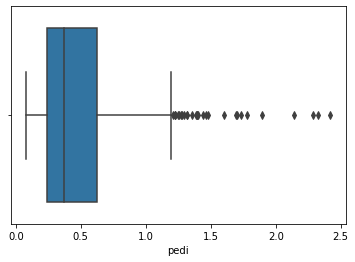

In [6]:
# Gráfico da Variável
sns.boxplot(dados.pedi)

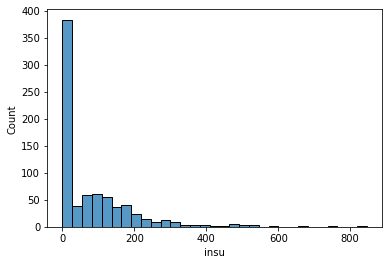

In [7]:
dados.describe()
sns.histplot(dados.insu)

In [8]:
# Correlação
dados.corr()

,n_grav,glic,pres_art,esp_tr,insu,imc,pedi,idade,classe
n_grav,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glic,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres_art,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
esp_tr,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insu,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
imc,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
idade,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
classe,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#3° Pré-Processamento dos Dados

In [9]:
# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

In [10]:
# Visualizando
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

## Normalização

In [11]:
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)


In [12]:
# Visualização
rescaledX

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

## Padronização

In [13]:
# Gerando o novo padrão
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)


In [14]:
# Visualizando
standardX

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

## Separando os dados em Treino e Teste usando a **Validação Cruzda**

In [15]:
# Definindo os valores para o número de folds
# Separando os dados em folds
kfold  = KFold(n_splits=10, random_state=7, shuffle=True)

# 4° Criação da Máquina Preditiva 

#### Fazendo o teste e o treinamento do modelo com **Validação Cruzada**

In [16]:
# Criando o modelo
modelo = LogisticRegression()

# Cross Validation
resultado = cross_val_score(modelo,X, Y, cv = kfold)

# 5° Avaliação da Máquina Preditiva

In [17]:
# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 77.604


In [18]:
# Criando o modelo
modelo = LogisticRegression()

# Cross Validation
resultado1 = cross_val_score(modelo,rescaledX, Y, cv = kfold)

In [19]:
# Print do resultado
print("Acurácia1: %.3f" % (resultado1.mean() * 100))

Acurácia1: 77.479


In [20]:
# Criando o modelo
modelo = LogisticRegression()

# Cross Validation
resultado2 = cross_val_score(modelo,standardX, Y, cv = kfold)

In [21]:
# Print do resultado
print("Acurácia2: %.3f" % (resultado2.mean() * 100))

Acurácia2: 77.346


## **Conclusões:**

- Sem *Normalizar* ou *Padronizar* os Dados → **Acurácia** = $77,734$% 

- Dados *Normalizados* → **Acurácia** = $77,479$% 

- Dados *Padronizados*   → **Acurácia** = $77,346$% 

# <font color='GREYBlue'> Usando o **XGBoost** e comparando os resultados </font>



In [22]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Carregando os dados
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# 3°  Pré-Processamento

In [23]:
# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho dos dados de treino e de teste
teste_size = 0.33
seed = 7

# Criando o dataset de treino e de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# 4° Criação da Máquina Preditiva 

In [24]:
# Criando o modelo
modelo2 = XGBClassifier()

# Treinando o modelo
modelo2.fit(X_treino, y_treino)

XGBClassifier()

In [25]:
# Fazendo previsões
y_pred = modelo2.predict(X_teste)
previsoes = [round(value) for value in y_pred]

# 5° Avaliação da Máquina Preditiva

In [26]:
# Avaliando as previsões
accuracy = accuracy_score(y_teste, previsoes)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 77.95%
